In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import sys

# Add the project root to Python path to import from utils
sys.path.append('..')
from utils.paths import RAW_DATA_DIR

# Load metadata using paths from paths.py
meta_path = os.path.join(RAW_DATA_DIR, 'Chest_xray_Corona_Metadata.csv')
df = pd.read_csv(meta_path)

# Initial shape and columns
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Missing values
print("\nMissing values:\n", df.isna().sum())

# Drop rows with missing essential fields
before = len(df)
df = df[df['X_ray_image_name'].notna() & df['Label'].notna()]
after = len(df)
print(f"Removed {before - after} rows with missing image name or label.")

before = len(df)
df = df.drop_duplicates(subset='X_ray_image_name')
after = len(df)
print(f"Removed {before - after} duplicate image rows.")

# Basic stats
print("\nLabel distribution:\n", df['Label'].value_counts())
print("\nVirus categories:\n", df['Label_1_Virus_category'].value_counts(dropna=False))
print("\nVirus subtypes:\n", df['Label_2_Virus_category'].value_counts(dropna=False))

Dataset shape: (5910, 6)
Columns: ['Unnamed: 0', 'X_ray_image_name', 'Label', 'Dataset_type', 'Label_2_Virus_category', 'Label_1_Virus_category']

Missing values:
 Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64
Removed 0 rows with missing image name or label.
Removed 0 duplicate image rows.

Label distribution:
 Label
Pnemonia    4334
Normal      1576
Name: count, dtype: int64

Virus categories:
 Label_1_Virus_category
bacteria          2777
NaN               1576
Virus             1555
Stress-Smoking       2
Name: count, dtype: int64

Virus subtypes:
 Label_2_Virus_category
NaN              5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: count, dtype: int64


In [4]:
df['Label'] = df['Label'].replace('Pnemonia', 'Pneumonia')

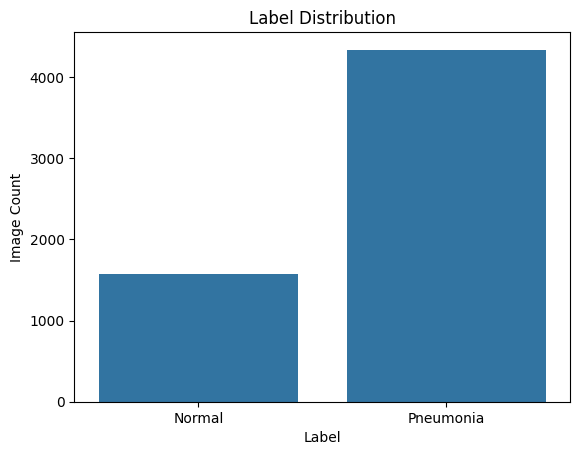

In [5]:
sns.countplot(data=df, x='Label')
plt.title("Label Distribution")
plt.ylabel("Image Count")
plt.show()

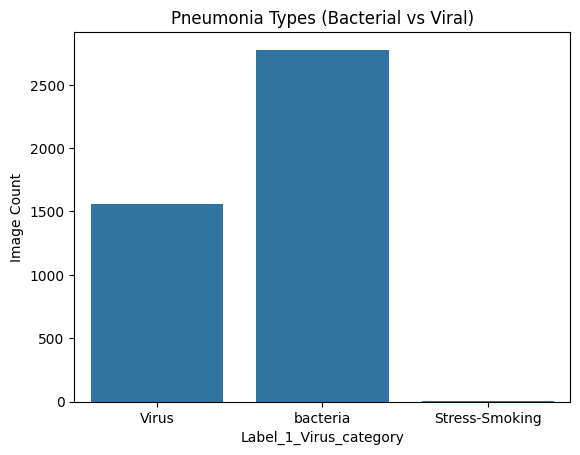

In [6]:
pneumonia_df = df[df['Label'] == 'Pneumonia']

sns.countplot(data=pneumonia_df, x='Label_1_Virus_category')
plt.title("Pneumonia Types (Bacterial vs Viral)")
plt.ylabel("Image Count")
plt.show()

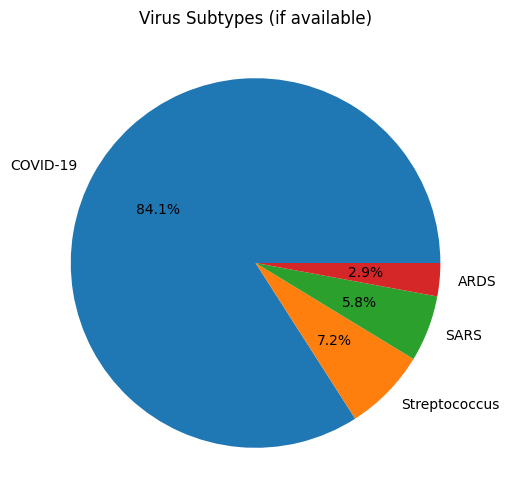

In [7]:
subtypes = df['Label_2_Virus_category'].value_counts()
subtypes.plot.pie(autopct='%1.1f%%', figsize=(6,6), title="Virus Subtypes (if available)")
plt.ylabel('')
plt.show()


Label: Pneumonia


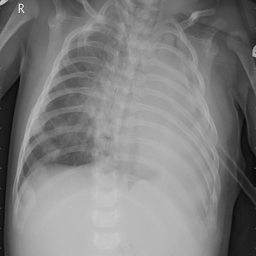

Label: Pneumonia


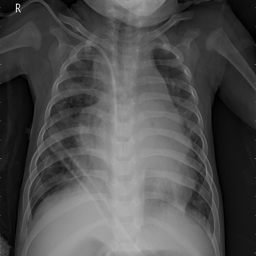

Label: Pneumonia


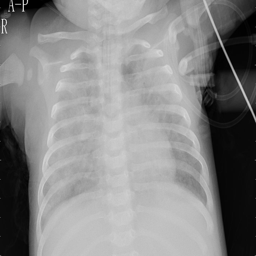

Label: Normal


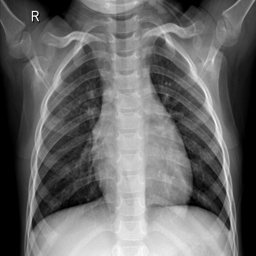

In [10]:
from IPython.display import display

# Use the RAW_DATA_DIR from paths.py
image_dir = os.path.join(RAW_DATA_DIR, 'Coronahack-Chest-XRay-Dataset', 'Coronahack-Chest-XRay-Dataset', 'train')

# Verify the directory exists
if not os.path.exists(image_dir):
    print(f"Warning: Directory doesn't exist: {image_dir}")
    print(f"Contents of {RAW_DATA_DIR}: {os.listdir(RAW_DATA_DIR)}")

sample_df = df[df['Label'].isin(['Normal', 'Pneumonia'])].sample(4, random_state=1)

for _, row in sample_df.iterrows():
    print(f"Label: {row['Label']}")
    img_path = os.path.join(image_dir, row['X_ray_image_name'])
    if os.path.exists(img_path):
        display(Image.open(img_path).convert("RGB").resize((256, 256)))
    else:
        print(f"Image not found: {img_path}")